In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Exercise 1

In [4]:
def SIR_birthdeath(S0,I0,R0, beta, gamma, mu_birth, mu_death, stepsize, max_steps):
    S = [S0]
    I = [I0]
    R = [R0]
    T = [0]
    
    for step in range(max_steps):
        S_prev, I_prev, R_prev = S[-1], I[-1], R[-1]
        N_prev = S_prev + I_prev + R_prev
        
        if N_prev >= 1500:
            break
        
        dS_dt = -beta * S_prev * I_prev / N_prev - mu_death*S_prev + mu_birth*N_prev
        dI_dt = beta * S_prev * I_prev / N_prev - gamma * I_prev - mu_death*I_prev
        dR_dt = gamma * I_prev - mu_death*R_prev
        
        S_new = S_prev + dS_dt * stepsize
        I_new = I_prev + dI_dt * stepsize
        R_new = R_prev + dR_dt * stepsize
        t_new = T[-1] + stepsize
        
        S.append(S_new)
        I.append(I_new)
        R.append(R_new)
        T.append(t_new)
    
    return np.array(S), np.array(I), np.array(R), np.array(T)

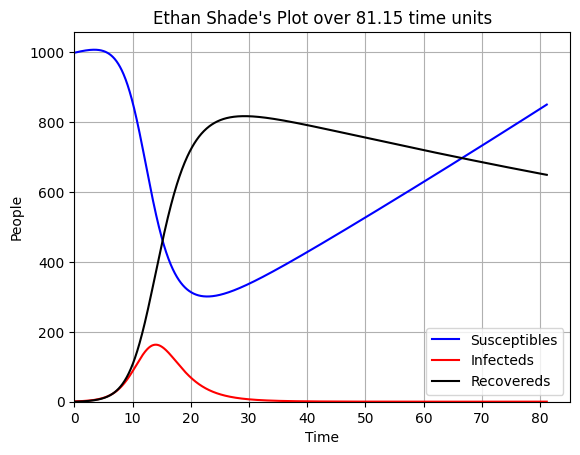

In [5]:
fig, ax = plt.subplots()
S0 = 999
I0 = 1
R0 = 0
beta = 1
gamma = 0.5
mu_birth = 0.01
mu_death = 0.5*mu_birth
stepsize = 0.05
max_steps = 10000

S,I,R,T = SIR_birthdeath(S0,I0,R0,beta,gamma, mu_birth, mu_death, stepsize, max_steps)
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.set_xlabel('Time')
ax.set_ylabel('People')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title(f"Ethan Shade's Plot over {T[-1]:.2f} time units")
ax.legend()
plt.grid(True)
plt.savefig("/Users/ethanshade/Desktop/Infectious Diseases/Python/HW1/Q1.png")

Exercise 3

In [6]:
def f(x):
    return x

def g(x,R0):
    return 1 - np.exp(-R0*x)

def h(x, R0):
    return 1 - np.exp(-R0*x) - x

Nontrivial Solution at -0.23016
Nontrivial Solution at -0.00000
Nontrivial Solution at 0.17613
Nontrivial Solution at 0.31370


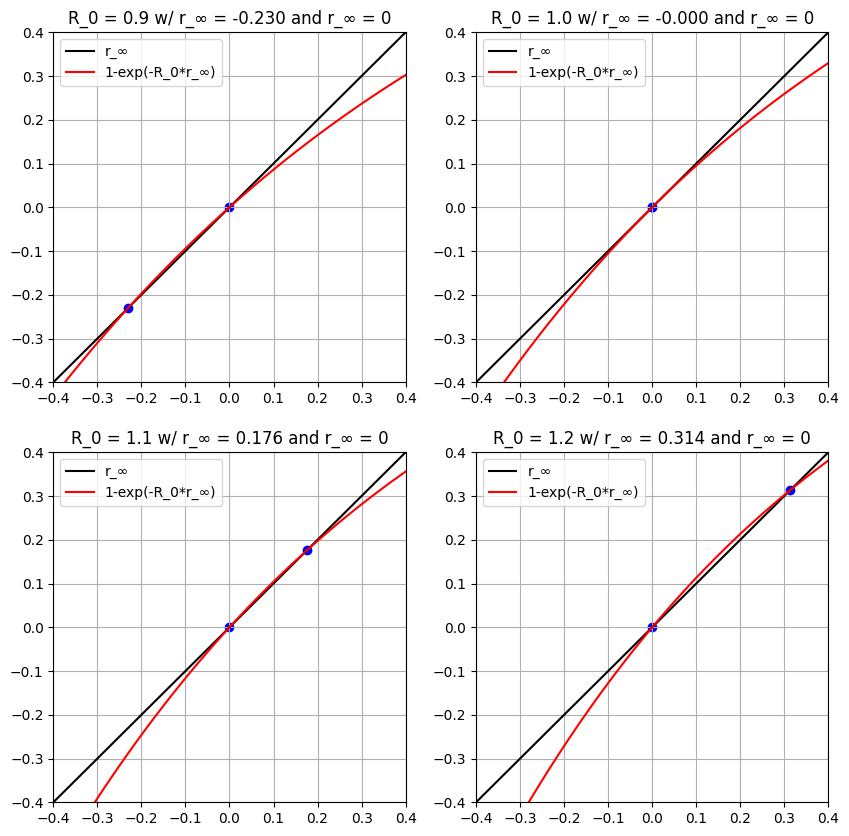

In [7]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

x = np.linspace(-.5, .5, 100)
y_f = f(x)

R0 = [0.9, 1, 1.1, 1.2]
indicex = [[0,0],[0,1],[1,0],[1,1]]
guess = [-.2, 0.1, .2, .3]

for i in range(4):
    y_g = g(x,R0[i])
    row, col = indicex[i]
    ax = axs[row, col]
    ax.plot(x,y_f, color='k', label='r_∞')
    ax.plot(x,y_g, color='r',label='1-exp(-R_0*r_∞)')
    x_solution = fsolve(lambda x: h(x, R0[i]), guess[i])
    ax.scatter(0, 0, color = 'b')
    ax.scatter(x_solution, x_solution, color = 'b')
    ax.set_title(f'R_0 = {R0[i]:.1f} w/ r_∞ = {x_solution[0]:.3f} and r_∞ = 0')
    print(f'Nontrivial Solution at {x_solution[0]:.5f}')

for row in axs:
    for ax in row:
        ax.set_ylim(bottom=-0.4, top=0.4)
        ax.set_xlim(left=-0.4, right=0.4)
        ax.legend()
        ax.grid(True)

plt.savefig("/Users/ethanshade/Desktop/Infectious Diseases/Python/HW1/Q3c.png")

In [189]:
def SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

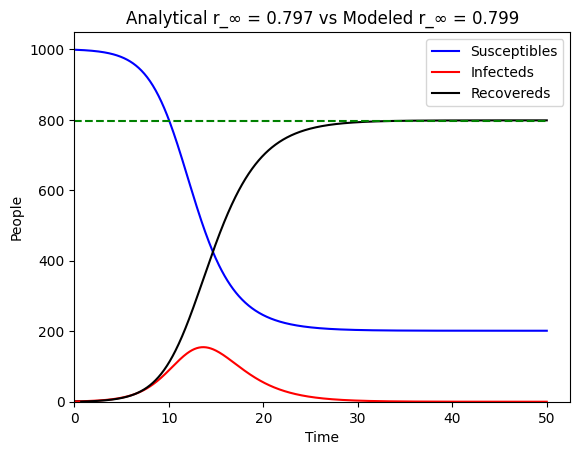

In [190]:
S0=999
I0=1
R0=0 
beta=1 
gamma=0.5
t_max=50
stepsize=0.05

guess=.8

S,I,R,T = SIR(S0,I0,R0, beta, gamma, t_max, stepsize)
fig, ax = plt.subplots()
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.set_xlabel('Time')
ax.set_ylabel('People')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.legend()

y_g = g(x,beta/gamma)
ax.plot(x,y_f, color='k')
ax.plot(x,y_g, color='r')
x_solution = fsolve(lambda x: h(x, beta/gamma), guess)
ax.set_title(f"Analytical r_∞ = {x_solution[0]:.3f} vs Modeled r_∞ = {R[-1]/1000:.3f}")
ax.plot([0,t_max],[1000*x_solution,1000*x_solution],'g--')

plt.savefig("/Users/ethanshade/Desktop/Infectious Diseases/Python/HW1/Q3d.png")

Exercise 4

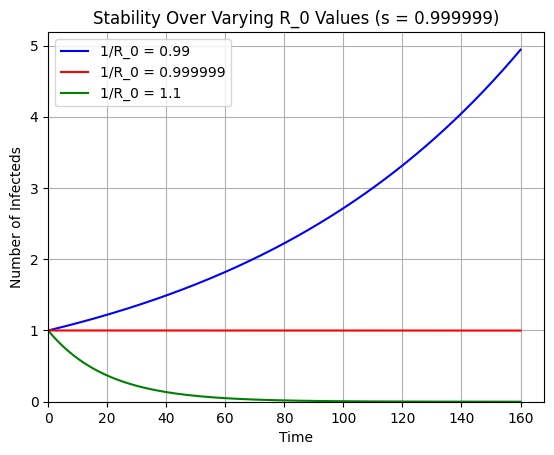

In [191]:
S0 = 10E6 - 1
I0 = 1
R0 = 0
Gamma = [0.99, 0.999999, 0.55]
Beta =  [1, 1, 0.5]
t_max = 160
stepsize = 0.01
for i in range(3):
    S,I,R,T = SIR(S0,I0,R0, Beta[i], Gamma[i], t_max, stepsize)
    match i:
        case 0:
            I1 = I
        case 1:
            I2 = I
        case 2:
            I3 = I
fig, ax = plt.subplots()
ax.plot(T,I1, color='b', label=f"1/R_0 = {Gamma[0] / Beta[0]}")
ax.plot(T,I2, color='r', label=f"1/R_0 = {Gamma[1] / Beta[1]}")
ax.plot(T,I3, color='g', label=f"1/R_0 = {Gamma[2] / Beta[2]}")
ax.set_xlabel('Time')
ax.set_ylabel('Number of Infecteds')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title("Stability Over Varying R_0 Values (s = 0.999999)")
ax.legend()
plt.grid(True)
plt.savefig("/Users/ethanshade/Desktop/Infectious Diseases/Python/HW1/Q4.png")